# Women E-Commerce Reviews Sentiment Analysis and EDA
This notebook interprets the dataset from different angles and implements sentiment analysis on review texts to quantify its polarity using text blob module

Kaggle Dataset: https://www.kaggle.com/code/lindaannang/ecommerce-women-clothing-review/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob

In [2]:
data = pd.read_csv('/Users/areeshaasif/Desktop/vscode/Womens Clothing E-Commerce Reviews.csv', index_col=False)
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [3]:
# removing index column
data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
data.drop(["a"], axis=1, inplace=True)
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [4]:
data.isnull().sum(axis = 0)

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [5]:
data.loc[data['Review Text'].isnull() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
92,861,23,NaN,NaN,5,1,0,General Petite,Tops,Knits
93,1081,31,NaN,NaN,5,1,0,General,Dresses,Dresses
98,1133,50,NaN,NaN,5,1,0,General,Jackets,Outerwear
135,861,35,NaN,NaN,4,1,0,General Petite,Tops,Knits
142,1126,35,NaN,NaN,5,1,0,General,Jackets,Outerwear
...,...,...,...,...,...,...,...,...,...,...
23258,862,35,NaN,NaN,4,1,0,General,Tops,Knits
23301,862,52,NaN,NaN,5,1,0,General,Tops,Knits
23303,823,46,NaN,NaN,5,1,0,General,Tops,Blouses
23470,1104,39,NaN,NaN,5,1,0,General Petite,Dresses,Dresses


In [6]:
data.loc[data['Department Name'].isnull() == True]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
9444,72,25,My favorite socks!!!,"I never write reviews, but these socks are so ...",5,1,0,NaN,NaN,NaN
13767,492,23,So soft!,I just love this hoodie! it is so soft and com...,5,1,1,NaN,NaN,NaN
13768,492,49,Wardrobe staple,Love this hoodie. so soft and goes with everyt...,5,1,0,NaN,NaN,NaN
13787,492,48,NaN,NaN,5,1,0,NaN,NaN,NaN
16216,152,36,Warm and cozy,"Just what i was looking for. soft, cozy and warm.",5,1,0,NaN,NaN,NaN
16221,152,37,Love!,I am loving these. they are quite long but are...,5,1,0,NaN,NaN,NaN
16223,152,39,"""long and warm""",These leg warmers are perfect for me. they are...,5,1,0,NaN,NaN,NaN
18626,184,34,Nubby footless tights,"These are amazing quality. i agree, size up to...",5,1,5,NaN,NaN,NaN
18671,184,54,New workhorse,These tights are amazing! if i care for them w...,5,1,0,NaN,NaN,NaN
20088,772,50,Comfy sweatshirt!,This sweatshirt is really nice! it's oversize...,5,1,0,NaN,NaN,NaN


## Women from which age group should be targetted?

In [7]:
data['Age group'] = pd.cut(data.Age, 9)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age group
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"(27.0, 36.0]"
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"(27.0, 36.0]"
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(54.0, 63.0]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(45.0, 54.0]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(45.0, 54.0]"


"Rating" does not have any nulls indicating that it can be used as a factor to quantify the number of orders from each age group to estimate the targetted age group

In [8]:
age_group =data.groupby('Age group' )['Rating'].agg('sum')
age_group

Age group
(17.919, 27.0]     8496
(27.0, 36.0]      24111
(36.0, 45.0]      27416
(45.0, 54.0]      19094
(54.0, 63.0]      12469
(63.0, 72.0]       5756
(72.0, 81.0]        784
(81.0, 90.0]        373
(90.0, 99.0]         49
Name: Rating, dtype: int64

In [9]:
age_group.index = age_group.index.values.astype(str)
age_group

(17.919, 27.0]     8496
(27.0, 36.0]      24111
(36.0, 45.0]      27416
(45.0, 54.0]      19094
(54.0, 63.0]      12469
(63.0, 72.0]       5756
(72.0, 81.0]        784
(81.0, 90.0]        373
(90.0, 99.0]         49
Name: Rating, dtype: int64

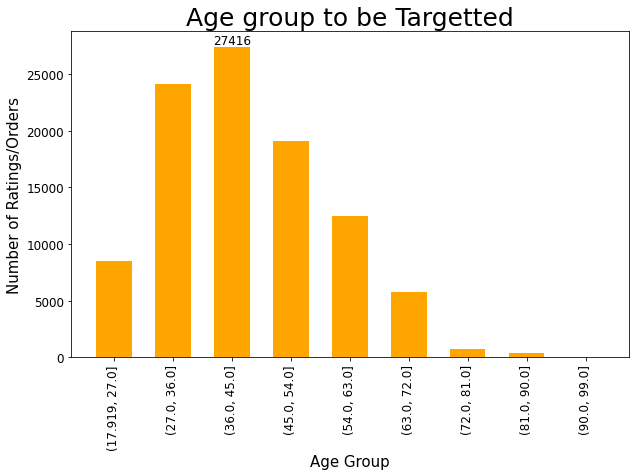

In [10]:
fig = plt.figure(figsize = (10, 6))
plt.bar(age_group.index.values, age_group, color ='orange',width = 0.6)
plt.text(2,27700,age_group.max(),ha='center',fontsize=12)
plt.xlabel("Age Group", fontsize=15)
plt.ylabel("Number of Ratings/Orders", fontsize=15)
plt.title("Age group to be Targetted", fontsize=25)
plt.xticks(fontsize= 12, rotation=90)
plt.yticks(fontsize= 12)
plt.show()

As evident, top three targetted age groups should be: <br>
    -> <b>36 - 45 </b> <br>
    -> <b>27 - 36 </b><br>
    -> <b>45 - 54</b> <br>
When targetted, these age groups will contribute to the engagement of the ecommerce site relatively gaining ratings and reviews which will build trust for other customers to buy those products.

## What products are most popular among all age groups?

In [11]:
# class name signifies the kind of product being bought
pd.set_option('display.max_rows', 600)
prod_group = data.groupby('Age group' )['Class Name'].value_counts(sort=True)
prod_group

Age group       Class Name    
(17.919, 27.0]  Dresses            584
                Knits              400
                Blouses            244
                Pants              101
                Sweaters            99
                Skirts              84
                Jeans               76
                Fine gauge          75
                Jackets             64
                Lounge              60
                Swim                44
                Intimates           32
                Outerwear           27
                Shorts              27
                Sleep               23
                Legwear             18
                Layering            17
                Trend               11
                Casual bottoms       2
(27.0, 36.0]    Dresses           1738
                Knits             1161
                Blouses            680
                Pants              297
                Sweaters           297
                Skirts           

#### Top Three Most popular products among each age group
For all age groups except (90.0, 99.0] and (81.0, 90.0] <b>dresses, knits and blouses are the most 
    popular products </b>. However, (81.0, 90.0] age group prefers to buy knits, dresses and sweaters. (90.0, 99.0] 
    age group mostly buys dresses, jeans and fine gauge.
    Thus, it will prove beneficial for the brands to invest in dresses, blouses and knits to attract more 
    customers and revenue.

## Are Recommendations and Ratings aligned with eachother?

In [12]:
rateVSrecom = data.groupby('Rating')['Recommended IND'].value_counts().sort_index() # value counts of no.of recommendations
rateVSrecom

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [13]:
# Segregatting counts 

recommended =[] #recommendations
not_recommended = [] # not recommendations
# for index, value in rateVSrecom.values:
#     print(index)

for index, value in enumerate(rateVSrecom.values):
    if index % 2 == 0 or index == 0:
        not_recommended.append(value)
    else:
        recommended.append(value)
        
print(recommended)
print(not_recommended)

[16, 94, 1189, 4909, 13106]
[826, 1471, 1682, 168, 25]


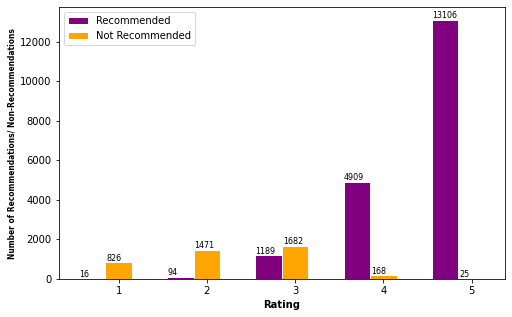

In [14]:
fig = plt.figure(figsize = (8, 5))
# set width of bars
barWidth = 0.3
 
# Set position of bar on X axis
r1 = np.arange(len(recommended))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, recommended, color='purple', width=barWidth, edgecolor='white', label='Recommended')
plt.bar(r2, not_recommended, color='orange', width=barWidth, edgecolor='white', label='Not Recommended')
    
# Add xticks on the middle of the group bars
plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Number of Recommendations/ Non-Recommendations', size=7.5, fontweight='bold')
plt.xticks([r + barWidth for r in range(len(recommended))], ['1', '2', '3', '4', '5'])
 
for index,value in enumerate(recommended):
    plt.text(x=index-0.15, y =value+100 , s=f"{value}" , fontdict=dict(fontsize=8))

for index,value in enumerate(not_recommended):
    plt.text(x=index+0.16 , y =value+100 , s=f"{value}" , fontdict=dict(fontsize=8))
    
# Create legend & Show graphic
plt.legend()
plt.show()

The above results depict the relationship between rating and recommendaions. The graph shows that rating is directly proportional to recommendations, considering that 4 and 5 are considered higher ratings. For average rating i.e., 3 the number of recommendations and non recommendations are neck to neck, hence showing how average products are neither too good or too bad.

## Division, Class, Department Name by Positive Feedback Count

In [15]:
feedback_group = data.groupby(['Division Name', 'Department Name', 'Class Name'])['Positive Feedback Count'].agg('sum')
feedback_group

Division Name   Department Name  Class Name    
General         Bottoms          Casual bottoms        0
                                 Jeans              1371
                                 Pants              2002
                                 Shorts              531
                                 Skirts             1404
                Dresses          Dresses           11766
                Jackets          Jackets            1183
                                 Outerwear           702
                Tops             Blouses            5224
                                 Fine gauge         1349
                                 Knits              7882
                                 Sweaters           2025
                Trend            Trend               278
General Petite  Bottoms          Jeans               647
                                 Pants              1325
                                 Skirts              763
                Dresses          Dresses

### Above information suggests the following:

In [16]:
print("Contribution of product with highest PFC in Total PFC per Division\n")
#. General Division
highestg_pfc = feedback_group['General']['Dresses'] /feedback_group['General'].sum() * 100
print(highestg_pfc)

# General Petite Division
highestgp_pfc = feedback_group['General Petite']['Dresses'] /feedback_group['General Petite'].sum() * 100
print(highestgp_pfc)

# Intimates Division
highesti_pfc = feedback_group['Initmates']['Intimate']['Lounge']/feedback_group['Initmates'].sum() * 100
print(highesti_pfc)

# Highest contribution
highestt_pfc = feedback_group['General']['Dresses']/feedback_group.sum() * 100
print(highestt_pfc)

Contribution of product with highest PFC in Total PFC per Division

Class Name
Dresses    32.942296
Name: Positive Feedback Count, dtype: float64
Class Name
Dresses    36.657988
Name: Positive Feedback Count, dtype: float64
38.33948339483395
Class Name
Dresses    19.757523
Name: Positive Feedback Count, dtype: float64


<b>Above results about Positive Feedback Count (PFC) suggest</b>: <br>
General division has highest PFC at 11766 for dresses contributing to <b>32.9%</b> of total PFC for this division.<br>
General Petite division has highest PFC at 7744 for dresses contributing to <b>36.66%</b> of total PFC for this division.<br>
Intimates division has highest PFC at 1039 for loungrie contributing to <b>38.34%</b> of total PFC for this division.<br>
Moreover, dresses being the most positive rated contribute to <b>19.76%</b> of total PFC
<br>

In [17]:
print("Mean Number of PFC's per Division\n")
#. General Division
meang_pfc = feedback_group['General'].mean()
print(f'General: {meang_pfc}')

# General Petite Division
meangp_pfc = feedback_group['General Petite'].mean()
print(f'General Petite: {meangp_pfc}')

# Intimates Division
meani_pfc = feedback_group['Initmates'].mean()
print(f'Intimates: {meani_pfc}')

# total mean
print(f'Mean for all divisions: {feedback_group.mean()}')

Mean Number of PFC's per Division

General: 2747.4615384615386
General Petite: 1760.4166666666667
Intimates: 387.14285714285717
Mean for all divisions: 1861.0


<b>Above results about Positive Feedback Count (PFC) suggest</b>: <br>
    General division has the hightest mean PFC meaning that the divsion has most successful and popular products.
    Whereas, general petite and intimates are below the mean PFC, meaning they need more attention.


## Division, Class, Department Name by Recommended IND

In [18]:
recom_group = data.groupby(['Division Name', 'Department Name', 'Class Name'])['Recommended IND'].agg('sum')
recom_group

Division Name   Department Name  Class Name    
General         Bottoms          Casual bottoms       2
                                 Jeans              685
                                 Pants              684
                                 Shorts             266
                                 Skirts             502
                Dresses          Dresses           3029
                Jackets          Jackets            332
                                 Outerwear          208
                Tops             Blouses           1609
                                 Fine gauge         563
                                 Knits             2643
                                 Sweaters           717
                Trend            Trend               73
General Petite  Bottoms          Jeans              326
                                 Pants              472
                                 Skirts             297
                Dresses          Dresses           2078


### Above information suggests the following:

In [19]:
print("Contribution of product with highest recommendation count per Division\n")
#. General Division
highestg_rd = recom_group['General']['Dresses'] /recom_group['General'].sum() * 100
print(highestg_rd)

# General Petite Division
highestgp_rd = recom_group['General Petite']['Dresses'] /recom_group['General Petite'].sum() * 100
print(highestgp_rd)

# Intimates Division
highesti_rd = recom_group['Initmates']['Intimate']['Lounge']/recom_group['Initmates'].sum() * 100
print(highesti_rd)

# Highest contribution
highestt_rd = recom_group['General']['Dresses']/recom_group.sum() * 100
print(highestt_rd)

Contribution of product with highest recommendation count per Division

Class Name
Dresses    26.774507
Name: Recommended IND, dtype: float64
Class Name
Dresses    30.982556
Name: Recommended IND, dtype: float64
31.171875
Class Name
Dresses    15.694301
Name: Recommended IND, dtype: float64


<b>Above results about Recommendation Count suggest</b>: <br>
General division has highest count 3029 for dresses contributing to <b>32.9%</b> of total count for this division.<br>
General Petite division has highest PFC at 2078 for dresses contributing to <b>36.66%</b> of total count for this division.<br>
Intimates division has highest PFC at 399 for loungrie contributing to <b>38.34%</b> of total count for this division.<br>
Moreover, dresses from general being most recommended contribute to <b>15.7%</b> of total count
<br>

In [20]:
print("Mean Number of Recommendations per Division\n")
#. General Division
meang_rd = recom_group['General'].mean()
print(f'General: {meang_rd}')

# General Petite Division
meangp_rd = recom_group['General Petite'].mean()
print(f'General Petite: {meangp_rd}')

# Intimates Division
meani_rd = recom_group['Initmates'].mean()
print(f'Intimates: {meani_rd}')

# total mean
print(f'Mean for all divisions: {recom_group.mean()}')

Mean Number of Recommendations per Division

General: 870.2307692307693
General Petite: 558.9166666666666
Intimates: 182.85714285714286
Mean for all divisions: 603.125


<b>Above results about Recommendations Count suggest</b>: <br>
    General division has hightest mean recommendations meaning that the divsion has most successful and popular products.
    Whereas, general petite and intimates are below the mean recommendations, meaning they need more attention.

## Division, Class, Department Name by Rating

In [21]:
rating_group = data.groupby(['Division Name', 'Department Name', 'Class Name'])['Rating'].value_counts(sort=True)
rating_group

Division Name   Department Name  Class Name      Rating
General         Bottoms          Casual bottoms  4            1
                                                 5            1
                                 Jeans           5          499
                                                 4          142
                                                 3           86
                                                 2           40
                                                 1           20
                                 Pants           5          471
                                                 4          187
                                                 3           98
                                                 2           53
                                                 1           26
                                 Shorts          5          183
                                                 4           67
                                                

### Above information suggests the following:

In [22]:
print("Contribution of product with highest 5 star rating count per Division\n")
#. General Division 2023
highestg_rc = rating_group['General']['Dresses']['Dresses'][5] /rating_group['General'].sum() * 100
print(highestg_rc)

# General Petite Division 1374
highestgp_rc = rating_group['General Petite']['Dresses']['Dresses'][5] /rating_group['General Petite'].sum() * 100
print(highestgp_rc)

# Intimates Division
highesti_rc = rating_group['Initmates']['Intimate']['Lounge'][5]/rating_group['Initmates'].sum() * 100
print(highesti_rc)

# Highest contribution
highestt_rc = rating_group['General']['Dresses']['Dresses'][5]/rating_group.sum() * 100
print(highestt_rc)

Contribution of product with highest 5 star rating count per Division

14.60649819494585
16.92118226600985
18.17576564580559
8.618779822767554


<b>Above results about 5 Rating Count suggest</b>: <br>
General division has highest count 2023 for dresses contributing to <b>14.6%</b> of total count for this division.<br>
General Petite division has highest count 1374 for dresses contributing to <b>16.92%</b> of total count for this division.<br>
Intimates division has highest count at 273 for loungrie contributing to <b>18.2%</b> of total count for this division.<br>
Moreover, dresses from general being most 5 star rated contribute to <b>8.62%</b> of total count
<br>

<b><i>OVERALL, these stats suggest that dresses have been the most popular product sold by the store as it has most 5 star ratings, positive feedback count and recommendations. It is dealt under General Division and Dresses Department.</i><b>

## Sentiment Analysis on Reviews
 <b>polarity</b>: tells if statement is positive, negative or neutral <br>
<b>subjectivity</b>: tells if statement is based on personal opinion or facts (high subjectivity = personal opinion)

### Calculating Polarity

In [28]:
polarity_list = []
for review in data['Review Text']:
    testimonial = TextBlob(str(review))
    polarity_list.append(testimonial.sentiment.polarity)

In [29]:
data['Polarity'] = polarity_list
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age group,Polarity
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"(27.0, 36.0]",0.633333
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"(27.0, 36.0]",0.339583
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(54.0, 63.0]",0.073675
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(45.0, 54.0]",0.550000
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(45.0, 54.0]",0.512891


### Mean and Standard Deviation

In [30]:
print(f'Mean polairty of reviews: {data["Polarity"].mean()}')

Mean polairty of reviews: 0.2408352908194905


This signifies that mean poliarty (average) is 0.24, showing that mostly results are positive.

In [31]:
data['Polarity'].describe()

count    23486.000000
mean         0.240835
std          0.179603
min         -0.975000
25%          0.125505
50%          0.232450
75%          0.345229
max          1.000000
Name: Polarity, dtype: float64

The standard deviation suggests that the values are mostly clusterred around the mean polarity of the reviews.

### Depicting Progress of Products, Departments and Divisons as per Review Polarity

In [32]:
pol_group = data.groupby(['Division Name', 'Department Name', 'Class Name'])['Polarity'].agg('mean')
pol_group

Division Name   Department Name  Class Name    
General         Bottoms          Casual bottoms    0.165000
                                 Jeans             0.237591
                                 Pants             0.229905
                                 Shorts            0.238242
                                 Skirts            0.244235
                Dresses          Dresses           0.243619
                Jackets          Jackets           0.235300
                                 Outerwear         0.220006
                Tops             Blouses           0.242237
                                 Fine gauge        0.240983
                                 Knits             0.235371
                                 Sweaters          0.233888
                Trend            Trend             0.201861
General Petite  Bottoms          Jeans             0.251539
                                 Pants             0.250549
                                 Skirts            0

This information suggests that all products are reviewed positively on average with maximum for chemises under intimates and minimum for casual bottoms at 0.165.

In [33]:
pol_group2 = data.groupby('Class Name')['Polarity'].agg('mean')
pol_group2

Class Name
Blouses           0.244125
Casual bottoms    0.165000
Chemises          0.600000
Dresses           0.243093
Fine gauge        0.237309
Intimates         0.251864
Jackets           0.237716
Jeans             0.241969
Knits             0.239781
Layering          0.231621
Legwear           0.249130
Lounge            0.236760
Outerwear         0.219555
Pants             0.238130
Shorts            0.238242
Skirts            0.246218
Sleep             0.238263
Sweaters          0.236537
Swim              0.253107
Trend             0.200714
Name: Polarity, dtype: float64

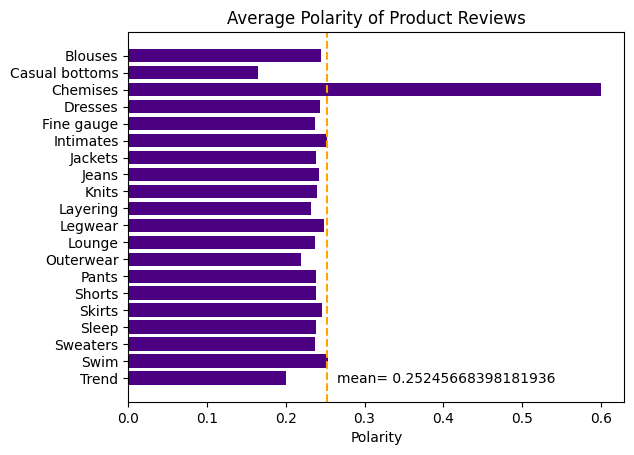

In [34]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(pol_group2.index.values, pol_group2, align='center', color="indigo")
plt.axvline(x=pol_group2.mean(), color='orange', linestyle='--') # average
plt.text(0.265,19.25,f'mean= {pol_group2.mean()}') # labelling mean

ax.set_yticks(pol_group2.index.values, labels=pol_group2.index.values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Polarity')
ax.set_title('Average Polarity of Product Reviews')

plt.show()

In [35]:
pol_group3 = data.groupby('Division Name')['Polarity'].agg('mean')
pol_group3

Division Name
General           0.238489
General Petite    0.244258
Initmates         0.243976
Name: Polarity, dtype: float64

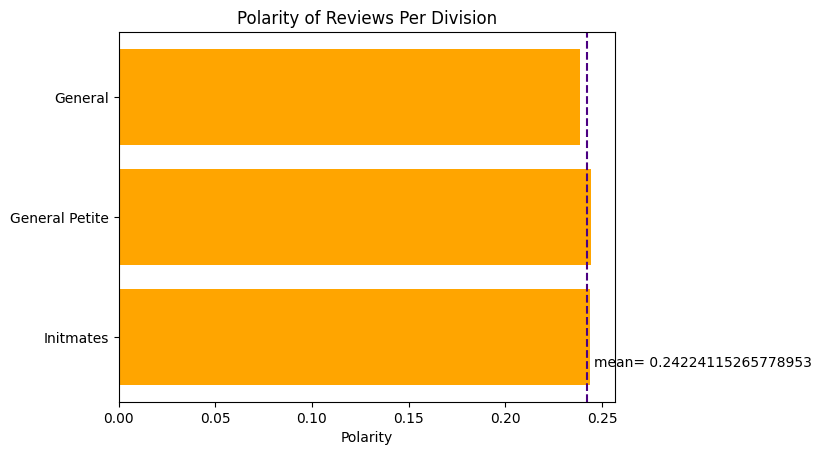

In [36]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(pol_group3.index.values, pol_group3, align='center', color="orange")
plt.axvline(x=pol_group3.mean(), color='indigo', linestyle='--') # average
plt.text(0.246,2.25,f'mean= {pol_group3.mean()}') # labelling mean

ax.set_yticks(pol_group3.index.values, labels=pol_group3.index.values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Polarity')
ax.set_title('Polarity of Reviews Per Division')

plt.show()

In [37]:
pol_group4 = data.groupby('Department Name')['Polarity'].agg('mean')
pol_group4

Department Name
Bottoms     0.241272
Dresses     0.243093
Intimate    0.242549
Jackets     0.231944
Tops        0.240364
Trend       0.200714
Name: Polarity, dtype: float64

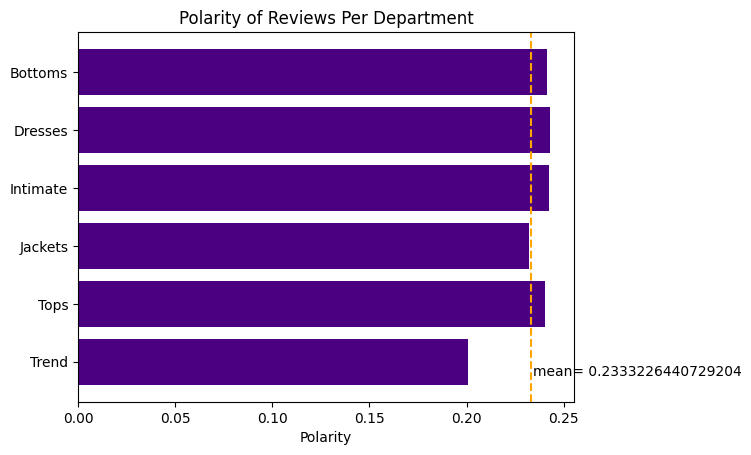

In [38]:
plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(pol_group4.index.values, pol_group4, align='center', color="indigo")
plt.axvline(x=pol_group4.mean(), color='orange', linestyle='--') # mean ref
plt.text(0.234,5.25,f'mean= {pol_group4.mean()}') # labelling mean

ax.set_yticks(pol_group4.index.values, labels=pol_group4.index.values)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Polarity')
ax.set_title('Polarity of Reviews Per Department')

plt.show()

The above information suggests that the reviews for each division and department are in line with the products that come under those with mean polarity at 0.2.
It can also be noticed that the Trends department and General Division are below mean proving that their respective products are not popular enough amongst other departments and divisions.